In [9]:
from pathlib import Path

def get_base_dir() -> Path:
    try:
        return Path(__file__).resolve().parent
    except NameError:
        return Path.cwd()

BASE_DIR = get_base_dir().parent  # go one directory up
OUTPUTS_DIR = BASE_DIR / "outputs"

pecha_files = list(OUTPUTS_DIR.rglob("*.json"))
print(f"Number of pechas : {len(pecha_files)}")


Number of pechas : 266


In [12]:
import json

pechas: list[dict] = []
for pecha in pecha_files:
    pechas.append(json.loads(pecha.read_text(encoding="utf-8")))


In [23]:
import matplotlib.pyplot as plt

volumes: dict[int, int] = {}
for pecha in pechas:
    text: dict[str, str] = pecha["texts"]
    vol_freq = len(text.keys())
    
    if vol_freq in volumes:
        volumes[vol_freq] += 1
    else:
        volumes[vol_freq] = 1


print(volumes)

{1: 266}


In [29]:
from tqdm import tqdm
from bo_sent_tokenizer import segment


# Text Analysis
char_count: dict[str, int] = {}
sentence_count: dict[str, int] = {}

for pecha in tqdm(pechas, desc="Text Analysis"):
    text = list(pecha["texts"].values())[0]

    # Character Count
    char_count[pecha["pecha_id"]] = len(text)

    # Sentence Count
    sentences = segment(text)
    sentence_count[pecha["pecha_id"]] = len(sentences.splitlines())

Text Analysis: 100%|██████████| 266/266 [00:06<00:00, 40.14it/s]


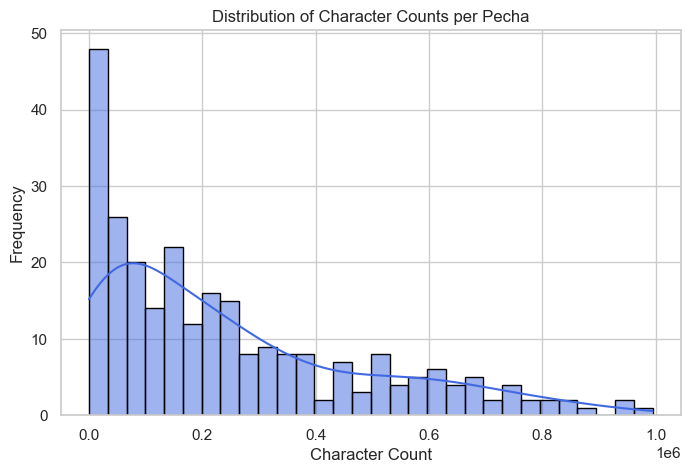

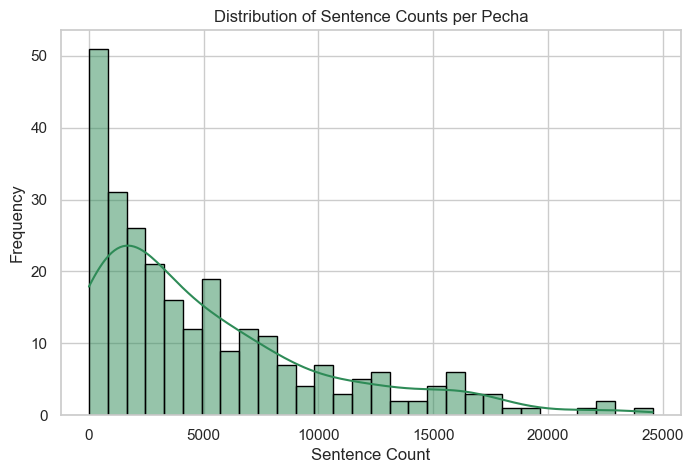

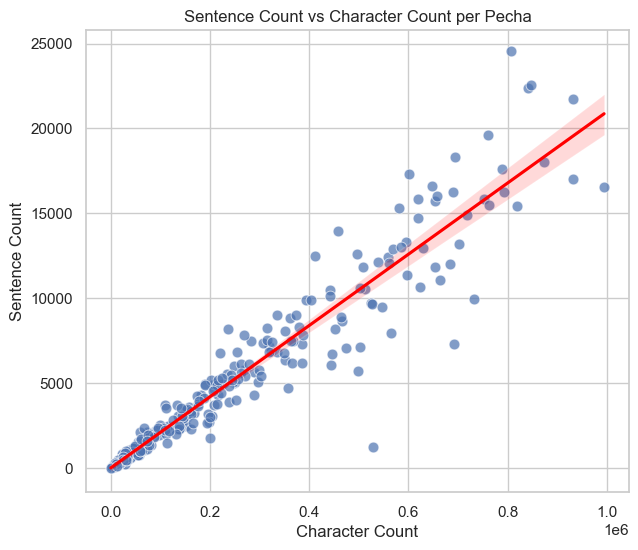

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for plotting
df = pd.DataFrame({
    "pecha_id": list(char_count.keys()),
    "char_count": list(char_count.values()),
    "sentence_count": list(sentence_count.values())
})

# --- Plot 1: Distribution of Character Counts ---
plt.figure(figsize=(8, 5))
sns.histplot(df["char_count"], bins=30, kde=True, color="royalblue", edgecolor="black")
plt.title("Distribution of Character Counts per Pecha")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

# --- Plot 2: Distribution of Sentence Counts ---
plt.figure(figsize=(8, 5))
sns.histplot(df["sentence_count"], bins=30, kde=True, color="seagreen", edgecolor="black")
plt.title("Distribution of Sentence Counts per Pecha")
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")
plt.show()

# --- Plot 3: Relationship between Char Count and Sentence Count ---
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x="char_count", y="sentence_count", s=60, alpha=0.7)
sns.regplot(data=df, x="char_count", y="sentence_count", scatter=False, color="red")  # trend line
plt.title("Sentence Count vs Character Count per Pecha")
plt.xlabel("Character Count")
plt.ylabel("Sentence Count")
plt.show()
